# **Importing the Dependinces**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [8]:
#dataset is now stored in a Pandas Dataframe
import io
wine_data=pd.read_csv(io.BytesIO(uploaded['WineQT.csv']))

In [9]:
#printing the data set
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [10]:
#printig the frist 5 rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
#printing the last 5 rows of the dataset
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [12]:
#check the shape of the dataset
wine_data.shape

(1143, 13)

In [13]:
#getting the more infomation of the dataset
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [15]:
#statistical measures of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [17]:
#check number number of missing values in the dataset
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# **Data Analysis**

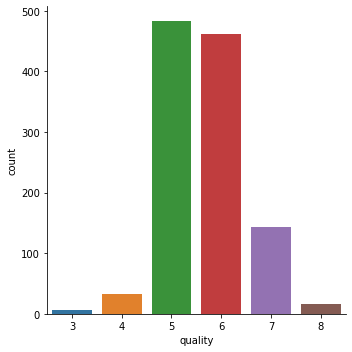

In [19]:
#number of values for each quality
sns.catplot(x='quality',data=wine_data,kind='count')

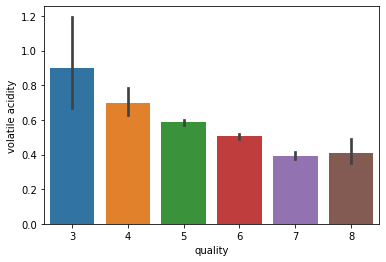

In [20]:
#volatile acidity vs quality
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

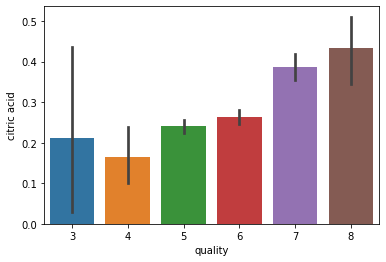

In [21]:
#citric acid  vs quality
sns.barplot(x='quality',y='citric acid',data=wine_data)

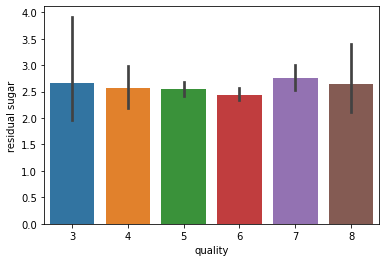

In [22]:
#residual sugar  vs quality
sns.barplot(x='quality',y='residual sugar',data=wine_data)

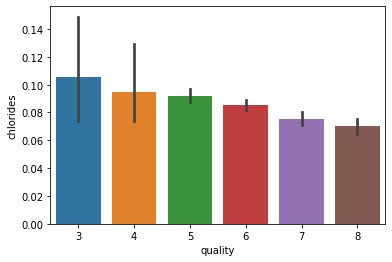

In [23]:
# chlorides vs quality
sns.barplot(x='quality',y='chlorides',data=wine_data)

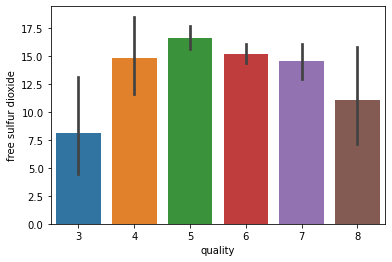

In [24]:
# free sulfur dioxide vs quality
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_data)

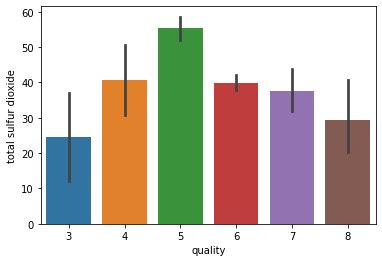

In [25]:
# total sulfur vs quality
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_data)

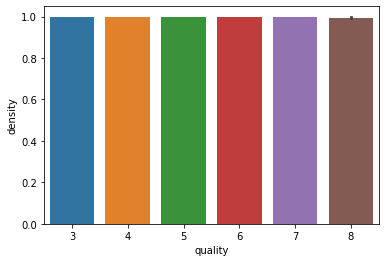

In [26]:
# density vs quality
sns.barplot(x='quality',y='density',data=wine_data)

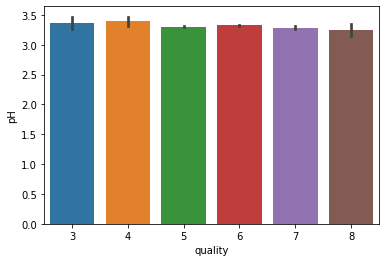

In [27]:
# pH vs quality
sns.barplot(x='quality',y='pH',data=wine_data)

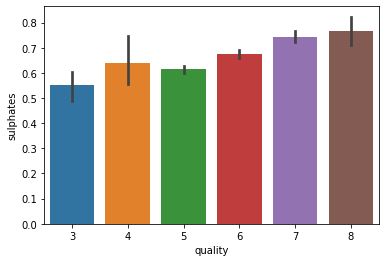

In [29]:
#sulphates vs quality
sns.barplot(x='quality',y='sulphates',data=wine_data)

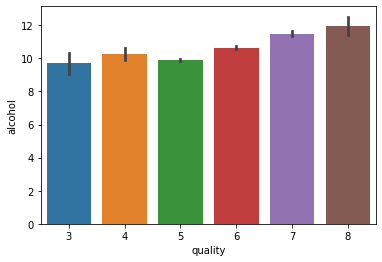

In [31]:
#alcohol quality
sns.barplot(x='quality',y='alcohol',data=wine_data)

# **Correlation**
1. Positive Correlation
2. Negative Correlation

In [32]:

correlation = wine_data.corr()

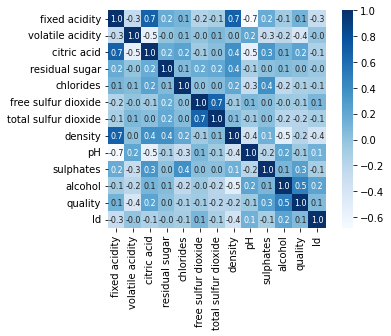

In [33]:
#constructing a heatmap to understand the correlation between the columns
#plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [34]:
#label Binaryzation
X=wine_data.drop('quality',axis=1)
Y=wine_data['quality'].apply(lambda y_value:1 if y_value >= 7 else 0)

In [35]:
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

# **Train Test Split**

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [37]:
#print X and X
print(X.shape, X_train.shape, X_test.shape)

(1143, 12) (914, 12) (229, 12)


# **Train the model with RandomForest Classifier**

In [38]:
model=RandomForestClassifier()

In [39]:
#fitting the model 
model.fit(X_train,Y_train)

RandomForestClassifier()

# **Model Evaluation**

In [40]:
#accurcy score on train data
X_train_prediction = model.predict(X_train)

In [41]:
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [42]:
#printing the accuracy values
print('Accuracy values: ',train_data_accuracy)

Accuracy values:  1.0


In [43]:
#accurcy score on test data
X_test_prediction = model.predict(X_test)

In [44]:
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [45]:
#printing the accuracy values
print('Accuracy values: ',test_data_accuracy)

Accuracy values:  0.9170305676855895


# **Building the Predictive System**

In [73]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,52)

In [74]:
#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [75]:
#reshape the data as we are predicting the lable for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [76]:
#prediction
prediction = model.predict(input_data_reshaped)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [77]:
print(prediction)
if (prediction[0]==1):
    print("Good Quality wine")
else:
    print("Bad Quality wine")

[0]
Bad Quality wine
